# Скачиваем данные и устанавливаем пакеты

In [ ]:
! pip install stanza
! pip install pymorphy2
! pip install -U 'scikit-learn<0.24'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 691 kB 24.1 MB/s 
     |████████████████████████████████| 240 kB 93.3 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=caefd42a7e3932bfa1ac9fade85c110ffd3c592427637e696d36f5d2e2f5e1b4
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 4.6 MB/s 
     |████████████████████████████████| 8.2 MB 59.0 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=e6871166df5691b7379721d139753a396eb84dc926909d5d114bea52672c7dcb
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt
Look

In [ ]:
! wget https://github.com/dice-group/FOX/raw/master/input/Wikiner/aij-wikiner-ru-wp3.bz2

--2022-12-26 23:50:53--  https://github.com/dice-group/FOX/raw/master/input/Wikiner/aij-wikiner-ru-wp3.bz2
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dice-group/FOX/master/input/Wikiner/aij-wikiner-ru-wp3.bz2 [following]
--2022-12-26 23:50:53--  https://raw.githubusercontent.com/dice-group/FOX/master/input/Wikiner/aij-wikiner-ru-wp3.bz2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7856559 (7.5M) [application/octet-stream]
Saving to: ‘aij-wikiner-ru-wp3.bz2’

aij-wikiner-ru-wp3. 100%[===================>]   7.49M  --.-KB/s    in 0.03s   

2022-12-26 23:50:53 (236 MB/s) - ‘aij-wikiner-ru-w

In [ ]:
! pip install corus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 2.2 MB/s 


In [ ]:
! pip install sklearn-crfsuite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 49.7 MB/s 


In [ ]:
# данные 
!wget https://github.com/named-entity/hse-nlp/raw/master/4th_year/Project/train_reviews.txt
!wget https://github.com/named-entity/hse-nlp/raw/master/4th_year/Project/train_aspects.txt
!wget https://github.com/named-entity/hse-nlp/raw/master/4th_year/Project/dev_reviews.txt

# split-данные
!wget https://github.com/named-entity/hse-nlp/raw/master/4th_year/Project/train_split_aspects.txt
!wget https://github.com/named-entity/hse-nlp/raw/master/4th_year/Project/train_split_reviews.txt

--2022-12-26 23:51:02--  https://github.com/named-entity/hse-nlp/raw/master/4th_year/Project/train_reviews.txt
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/named-entity/hse-nlp/master/4th_year/Project/train_reviews.txt [following]
--2022-12-26 23:51:03--  https://raw.githubusercontent.com/named-entity/hse-nlp/master/4th_year/Project/train_reviews.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 446118 (436K) [text/plain]
Saving to: ‘train_reviews.txt’

train_reviews.txt   100%[===================>] 435.66K  --.-KB/s    in 0.005s  

2022-12-26 23:51:03 (91.9 MB/s) - ‘train_reviews.txt’ save

In [ ]:
! wget https://raw.githubusercontent.com/named-entity/hse-nlp/master/4th_year/Project/dev_aspects.txt

--2022-12-27 00:43:38--  https://raw.githubusercontent.com/named-entity/hse-nlp/master/4th_year/Project/dev_aspects.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57508 (56K) [text/plain]
Saving to: ‘dev_aspects.txt’

dev_aspects.txt     100%[===================>]  56.16K  --.-KB/s    in 0.001s  

2022-12-27 00:43:39 (74.9 MB/s) - ‘dev_aspects.txt’ saved [57508/57508]



# Разметка последовательностей

#### Считываем данные

Сначала работаем со split-данными

In [ ]:
import pandas as pd

In [ ]:
train_asp = pd.read_csv(
    'train_split_aspects.txt', 
    delimiter='\t', 
    names=['text_id', 'category', 'mention', 'start', 'end', 'sentiment']
)
train_texts = pd.read_csv('train_split_reviews.txt', delimiter='\t', names=['text_id','text'])

In [ ]:
train_asp.head(2)

,text_id,category,mention,start,end,sentiment
0,30808,Whole,ресторане,16,25,neutral
1,30808,Interior,первом этаже,43,55,neutral


In [ ]:
train_texts.head(2)

,text_id,text
0,25709,"Были 1 февраля. Я второй раз, подруга - первый..."
1,10099,Были в Дитае на прошлой неделе с подругой. Заш...


#### stanza

In [ ]:
import stanza
stanza.download('ru')
nlp = stanza.Pipeline('ru', processors='tokenize')

INFO:stanza:Downloading default packages for language: ru (Russian) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Done loading processors!


In [ ]:
def get_reviews(filename):
  reviews = {}
  with open(filename) as f:
    for line in f:
      line = line.rstrip('\r\n').split('\t')
      reviews[line[0]] = line[1]
  return reviews

In [ ]:
reviews = get_reviews('train_split_reviews.txt')

In [ ]:
from collections import defaultdict

def get_aspects(filename):
  aspects = defaultdict(list)
  with open(filename) as f:
    for line in f:
      line = line.rstrip('\r\n').split('\t')
      keys = ('category', 'mention', 'start', 'end', 'sentiment')
      aspects[line[0]].append(dict(zip(keys, line[1:])))
  return aspects

In [ ]:
aspects = get_aspects('train_split_aspects.txt')

Получение аспектов в формате BIO

In [ ]:
from tqdm import tqdm
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

def get_BIO_df(dict_items):
  """
  Получение разметки формата BIO
  """
    CRF_BIO = []
    texts, pos_tags, bio_tags, sentiment = [], [], [], []
    begin, end, ids = [], [], []

    for text_id, text in tqdm(dict_items):
        processed = nlp(text).to_dict()[0]
        text, bio_tag, pos_tag, sent, for_crf = [], [], [], [], []

        for token in processed:
            add = False
            for a in aspects[text_id]:

                if token["start_char"] == int(a['start']) and token["end_char"] <= int(a['end']):
                    ids.append(text_id)
                    text.append(token["text"])
                    pos = token["upos"]
                    pos_tag.append(pos)
                    bio_tag.append('B-'+a['category'])
                    begin.append(token["start_char"])
                    end.append(token["end_char"])
                    sent.append(a['sentiment'])
                    for_crf.append({
                            'text': token["text"], 
                            'pos': pos,
                            'tag':'B-'+a['category'],
                            'text_id': text_id, 
                            'start': token["start_char"], 
                            'end': token["end_char"]})
                    add = True
                
                elif token["start_char"] > int(a['start']) and token["end_char"] <= int(a['end']):
                    ids.append(text_id)
                    text.append(token["text"])
                    pos = token["upos"]
                    pos_tag.append(pos)
                    bio_tag.append('I-'+a['category'])
                    begin.append(token["start_char"])
                    end.append(token["end_char"])
                    sent.append(a['sentiment'])
                    for_crf.append({
                        'text':token["text"], 
                        'pos': pos,
                        'tag':'I-'+a['category'],
                        'text_id': text_id, 
                        'start': token["start_char"], 
                        'end': token["end_char"]})
                    add = True
            if not add:
                ids.append(text_id)
                text.append(token["text"])
                pos = token["upos"]
                pos_tag.append(pos)
                bio_tag.append('O')
                begin.append(token["start_char"])
                end.append(token["end_char"])
                sent.append('no')
                for_crf.append({
                    'text':token["text"], 
                    'pos': pos, 
                    'tag':'O',
                    'text_id': text_id, 
                    'start': token["start_char"], 
                    'end': token["end_char"]})
                
        texts.extend(text)
        bio_tags.extend(bio_tag)
        pos_tags.extend(pos_tag)
        sentiment.extend(sent)
        CRF_BIO.append(for_crf)

    df = pd.DataFrame({
        'id' : ids, 
        'token' : texts,
        'bio_tags' : bio_tags, 
        'pos_tags' : pos_tags,  
        'start' : begin, 
        'end': end,
        'sentiment': sentiment})

    return df, CRF_BIO

In [ ]:
data = get_BIO_df(reviews.items())

100%|██████████| 213/213 [00:48<00:00,  4.40it/s]


In [ ]:
df_BIO = data[0]

In [ ]:
df_BIO.tail(2)

,id,token,bio_tags,pos_tags,start,end,sentiment
35414,32859,),O,PUNKT,1106,1107,no
35415,32859,),O,PUNKT,1107,1108,no


In [ ]:
df_BIO.head(2)

,id,token,bio_tags,pos_tags,start,end,sentiment
0,25709,Были,O,VERB,0,4,no
1,25709,1,O,PUNKT,5,6,no


# Распределение полученной разметки

#### Посмотрим распределение метаданных

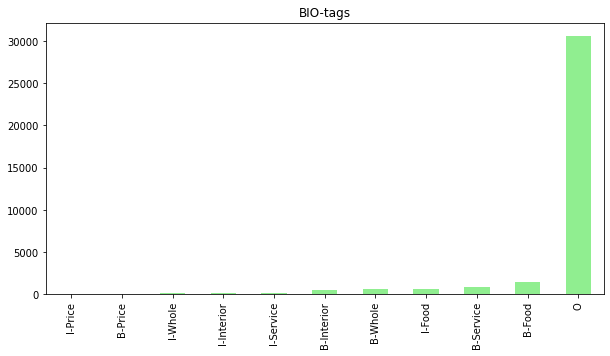

In [ ]:
from matplotlib import pyplot as plt
df_BIO.bio_tags.value_counts().sort_values().plot(kind = 'bar', 
                                                  color='lightgreen', title='BIO-tags')

plt.show()

Не очень хорошо, что очень много О, но это в целом нормальная ситуация

Посмотрим на распределение без О

In [ ]:
df_dropO = df_BIO[df_BIO.bio_tags != 'O']
df_dropO.head(3)

,id,token,bio_tags,pos_tags,start,end,sentiment
35,25709,девушки,B-Service,NOUN,168,175,positive
54,25709,заведения,B-Whole,NOUN,302,311,neutral
61,25709,диваны,B-Interior,NOUN,347,353,positive


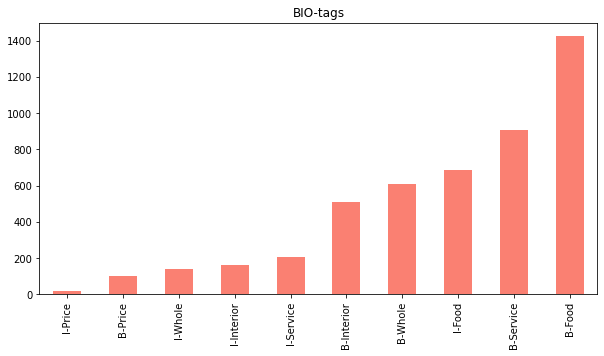

In [ ]:
df_dropO.bio_tags.value_counts().sort_values().plot(kind = 'bar', 
                                                  color='salmon', title='BIO-tags')
plt.show()

Распределение довольно неравномерное, можно предположить, что предсказание маловстречаемых тегов будет довольно печальным

И распределение POS-тегов

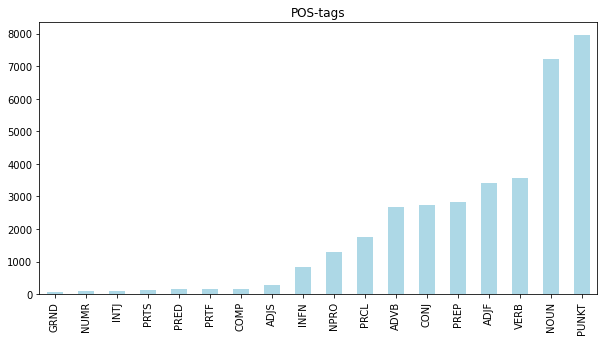

In [ ]:
df_BIO.pos_tags.value_counts().sort_values().plot(kind = 'bar', 
                                                  color='lightblue', title='POS-tags')
plt.show()

# CRF

In [ ]:
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics

In [ ]:
def word2features(sent, i):
    # достаёт фичи для i-го токена в предложении
    word = sent[i]['text']
    postag = sent[i]['pos']
    text_id = sent[i]['text_id']
    start = sent[i]['start']
    end = sent[i]['end']

    features = {
        'text_id': text_id, 
        'word': word,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        'start': start,
        'end': end
    }
    if i > 0:
        word1 = sent[i-1]['text']
        postag1 = sent[i-1]['pos']
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
        })
    else:
        features['BOS'] = True
        
    if i < len(sent)-1:
        word1 = sent[i+1]['text']
        postag1 = sent[i+1]['pos']
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True
                
    return features

def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [word['tag'] for word in sent]

def sent2tokens(sent):
    return [word['text'] for word in sent]

In [ ]:
from sklearn.model_selection import train_test_split

train_, test_ = train_test_split(data[1], test_size=0.1, random_state=0, shuffle=True)

In [ ]:
# TRAIN
X_train = [sent2features(s) for s in train_]
y_train = [sent2labels(s) for s in train_]

In [ ]:
# TEST
X_test = [sent2features(s) for s in test_]
y_test = [sent2labels(s) for s in test_]

In [ ]:
crf = sklearn_crfsuite.CRF(
    # используемый алгоритм
    algorithm='lbfgs',  
    # коэф. регуляризации
    c1=0.1,   
    c2=0.1, 
    # кол-во итераций для оптимизации lbfgs
    max_iterations=100, 
    # If true, transition features are also generated by CRF while training
    all_possible_transitions=True
)
crf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100)

In [ ]:
labels = list(crf.classes_)

y_pred = crf.predict(X_test)
metrics.flat_f1_score(y_test, y_pred, 
                      average='weighted', labels=labels)

0.9329482094878352

In [ ]:
sorted_labels = sorted(
    labels, 
    key=lambda name: (name[1:], name[0])
)
print(metrics.flat_classification_report(
    y_test, y_pred, labels=sorted_labels, digits=3
))

              precision    recall  f1-score   support

           O      0.956     0.984     0.970      3286
      B-Food      0.785     0.707     0.744       150
      I-Food      0.806     0.500     0.617        50
  B-Interior      0.794     0.466     0.587        58
  I-Interior      0.167     0.043     0.069        23
     B-Price      1.000     0.667     0.800         6
     I-Price      1.000     0.333     0.500         3
   B-Service      0.814     0.608     0.696        79
   I-Service      0.385     0.312     0.345        16
     B-Whole      0.825     0.855     0.839        55
     I-Whole      0.625     1.000     0.769         5

    accuracy                          0.939      3731
   macro avg      0.741     0.589     0.631      3731
weighted avg      0.932     0.939     0.933      3731



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=['O', 'B-Food', 'I-Food', 'B-Interior', 'I-Interior', 'B-Price', 'I-Price', 'B-Service', 'I-Service', 'B-Whole', 'I-Whole'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


# Обработка данных для проверки работы модели

In [ ]:
dev_rev = pd.read_csv('dev_reviews.txt', delimiter='\t', names=['text_id', 'text'])
dev_rev.head(3)

,text_id,text
0,13823,"Зашли в""аппетит"" случайно.Не смотря на то,что ..."
1,1427,Здравствуйте!Посетили ваше заведение вчера пер...
2,16714,"Были в пятницу (19.03.10), заказывали столик д..."


In [ ]:
dev_reviews = {}
with open('dev_reviews.txt') as f:
  for line in f:
    line = line.rstrip('\r\n').split('\t')
    dev_reviews[line[0]] = line[1]

In [ ]:
def transform_to_crf(dict_items):
  """
  Преобразование данных в подходящий вид для crf
  {'text': 'TEXT', 'pos': 'POS', 'text_id': ID, 'start': START, 'end': END}
  """
  texts = []
  for text_id, text in tqdm(dict_items):
    t = []
    processed = nlp(text)
    for token in processed.iter_tokens():
      parse = morph.parse(token.text)[0]
      p = parse.tag.POS
      if p is None:
        p = 'PUNKT'
      t.append({
            'text':token.text, 
            'pos': p, 
            'text_id': int(text_id), 
            'start': token.start_char, 
            'end': token.end_char})
      
    texts.append(t)
  return texts

In [ ]:
dev_txt = transform_to_crf(dev_reviews.items())

100%|██████████| 71/71 [00:16<00:00,  4.29it/s]


In [ ]:
dev_txt[0][0]

{'text': 'Зашли', 'pos': 'VERB', 'text_id': 13823, 'start': 0, 'end': 5}

In [ ]:
test_dev = [sent2features(s) for s in dev_txt]

In [ ]:
pred_dev = crf.predict(test_dev)

In [ ]:
def df_pred(y_pred, X_test):

  ids, tags, texts, starts, ends = [], [], [], [], []
  for num, i in enumerate(y_pred):
    for j, t in enumerate(i):
      if t!= 'O':
        if i[j].startswith('B') and i[j+1].startswith('I'):
          s=j+1
          tokens = []
          tokens.append(X_test[num][j]['word'])
          start = X_test[num][j]['start']
          while i[s].startswith('I'):
            tokens.append(X_test[num][s]['word'])
            s+=1
          end = X_test[num][s-1]['end']
          t_id = X_test[num][j]['text_id']
          t = i[j].split('-')[1]
          tags.append(t)
          ids.append(int(t_id))
          texts.append(' '.join(tokens))
          starts.append(start)
          ends.append(end)
        elif i[j].startswith('B') and not i[j+1].startswith('I'):
          ids.append(int(X_test[num][j]['text_id']))
          tags.append(i[j].split('-')[1])
          texts.append(X_test[num][j]['word'])
          starts.append(X_test[num][j]['start'])
          ends.append(X_test[num][j]['end'])
        else:
          pass

  df = pd.DataFrame({
      'text_id' : ids, 
      'tag' : tags,
      'text' : texts,  
      'start' : starts, 
      'end': ends })
  return df

In [ ]:
result = df_pred(pred_dev, test_dev)

In [ ]:
result.head(5)

,text_id,tag,text,start,end
0,13823,Whole,""" аппетит """,7,16
1,13823,Service,встретил,138,146
2,13823,Service,менеджер,147,155
3,13823,Service,девушка,179,186
4,13823,Service,проводила к столу,188,205


In [ ]:
with open('dev_pred_aspects.txt', 'w') as f:
  for text_id, tag, text, start, end in zip(result['text_id'], result['tag'], result['text'], result['start'], result['end']):
      print(text_id, tag, text, start, end, sep="\t", file=f)

# Оценка качества

In [ ]:
gold_test_path = "dev_aspects.txt"
pred_test_path = "dev_pred_aspects.txt"

In [ ]:
from collections import defaultdict
gold_aspect_cats = {}
with open(gold_test_path) as fg:
    for line in fg:
        line = line.rstrip('\r\n').split('\t')
        if line[0] not in gold_aspect_cats:
            gold_aspect_cats[line[0]] = {"starts":[], "ends":[], "cats":[], "sents":[]}
        gold_aspect_cats[line[0]]["starts"].append(int(line[3]))
        gold_aspect_cats[line[0]]["ends"].append(int(line[4]))
        gold_aspect_cats[line[0]]["cats"].append(line[1])
        gold_aspect_cats[line[0]]["sents"].append(line[5])

In [ ]:
full_match, partial_match, full_cat_match, partial_cat_match = 0, 0, 0, 0
total = 0
fully_matched_pairs = []
partially_matched_pairs = []
with open(pred_test_path) as fp:
    for line in fp:    
        total += 1
        line = line.rstrip('\r\n').split('\t')
        start, end = int(line[3]), int(line[4])
        category = line[1]
        doc_gold_aspect_cats = gold_aspect_cats[line[0]]
        if start in doc_gold_aspect_cats["starts"]:
            i = doc_gold_aspect_cats["starts"].index(start)
            if doc_gold_aspect_cats["ends"][i] == end:
                full_match += 1
                if doc_gold_aspect_cats["cats"][i] == category:
                    full_cat_match += 1
                else:
                    partial_cat_match += 1
                fully_matched_pairs.append(
                    (
                        [
                            doc_gold_aspect_cats["starts"][i], 
                            doc_gold_aspect_cats["ends"][i], 
                            doc_gold_aspect_cats["cats"][i],
                            doc_gold_aspect_cats["sents"][i]
                        ],
                        line
                    )
                )
                continue
        for s_pos in doc_gold_aspect_cats["starts"]:
            if start <= s_pos:
                i = doc_gold_aspect_cats["starts"].index(s_pos)
                if doc_gold_aspect_cats["ends"][i] == end:
                    partial_match += 1
                    partially_matched_pairs.append(
                        (
                            [
                                doc_gold_aspect_cats["starts"][i], 
                                doc_gold_aspect_cats["ends"][i], 
                                doc_gold_aspect_cats["cats"][i],
                                doc_gold_aspect_cats["sents"][i]
                            ],
                            line
                        )
                    )
                    if doc_gold_aspect_cats["cats"][i] == category:
                        partial_cat_match += 1
                    continue
                matched = False
                for e_pos in doc_gold_aspect_cats["ends"][i:]:
                    if s_pos <= end <= e_pos:
                        partial_match += 1
                        partially_matched_pairs.append(
                            (
                                [
                                    doc_gold_aspect_cats["starts"][i], 
                                    doc_gold_aspect_cats["ends"][i], 
                                    doc_gold_aspect_cats["cats"][i],
                                    doc_gold_aspect_cats["sents"][i]
                                ],
                                line
                            )
                        )
                        if doc_gold_aspect_cats["cats"][i] == category:
                            partial_cat_match += 1
                        matched = True
                        break
                if matched:
                    break
            if start > s_pos:
                i = doc_gold_aspect_cats["starts"].index(s_pos)
                if start < doc_gold_aspect_cats["ends"][i] <= end:
                    partial_match += 1
                    partially_matched_pairs.append(
                        (
                            [
                                doc_gold_aspect_cats["starts"][i], 
                                doc_gold_aspect_cats["ends"][i], 
                                doc_gold_aspect_cats["cats"][i],
                                doc_gold_aspect_cats["sents"][i]
                            ],
                            line
                        )
                    )
                    if doc_gold_aspect_cats["cats"][i] == category:
                        partial_cat_match += 1
                    break

In [ ]:
gold_size = sum([len(gold_aspect_cats[x]["cats"]) for x in gold_aspect_cats])

In [ ]:
print(f"""
Full match precision: {full_match / total}
Full match recall: {full_match / gold_size}
Partial match ratio in pred: {(full_match + partial_match)  / total}
Full category accuracy: {full_cat_match / total}
Partial category accuracy: {(full_cat_match + partial_cat_match) / total}
""")


Full match precision: 0.7781282860147214
Full match recall: 0.6218487394957983
Partial match ratio in pred: 0.882229232386961
Full category accuracy: 0.7486855941114616
Partial category accuracy: 0.8738170347003155



# Обучение на полных данных

In [ ]:
final_reviews = get_reviews('train_reviews.txt')

In [ ]:
final_aspects = get_aspects('train_aspects.txt')

In [ ]:
final_data = get_BIO_df(final_reviews.items())

100%|██████████| 284/284 [01:12<00:00,  3.91it/s]


In [ ]:
X_train = [sent2features(s) for s in final_data[1]]
y_train = [sent2labels(s) for s in final_data[1]]

In [ ]:
model_crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs', 
    c1=0.1, 
    c2=0.1, 
    max_iterations=100, 
    all_possible_transitions=True
)

In [ ]:
model_crf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100)

In [ ]:
import pickle
pickle.dump(model_crf, open('part1.sav', 'wb'))